# Task 03

## Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [50]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv(r"C:\Users\OM KHARODE\Downloads\bank.csv")

In [52]:
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [53]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [54]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [55]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [57]:
# checking for null matrix
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [58]:
# checking for duplicate values
df.duplicated().sum()

0

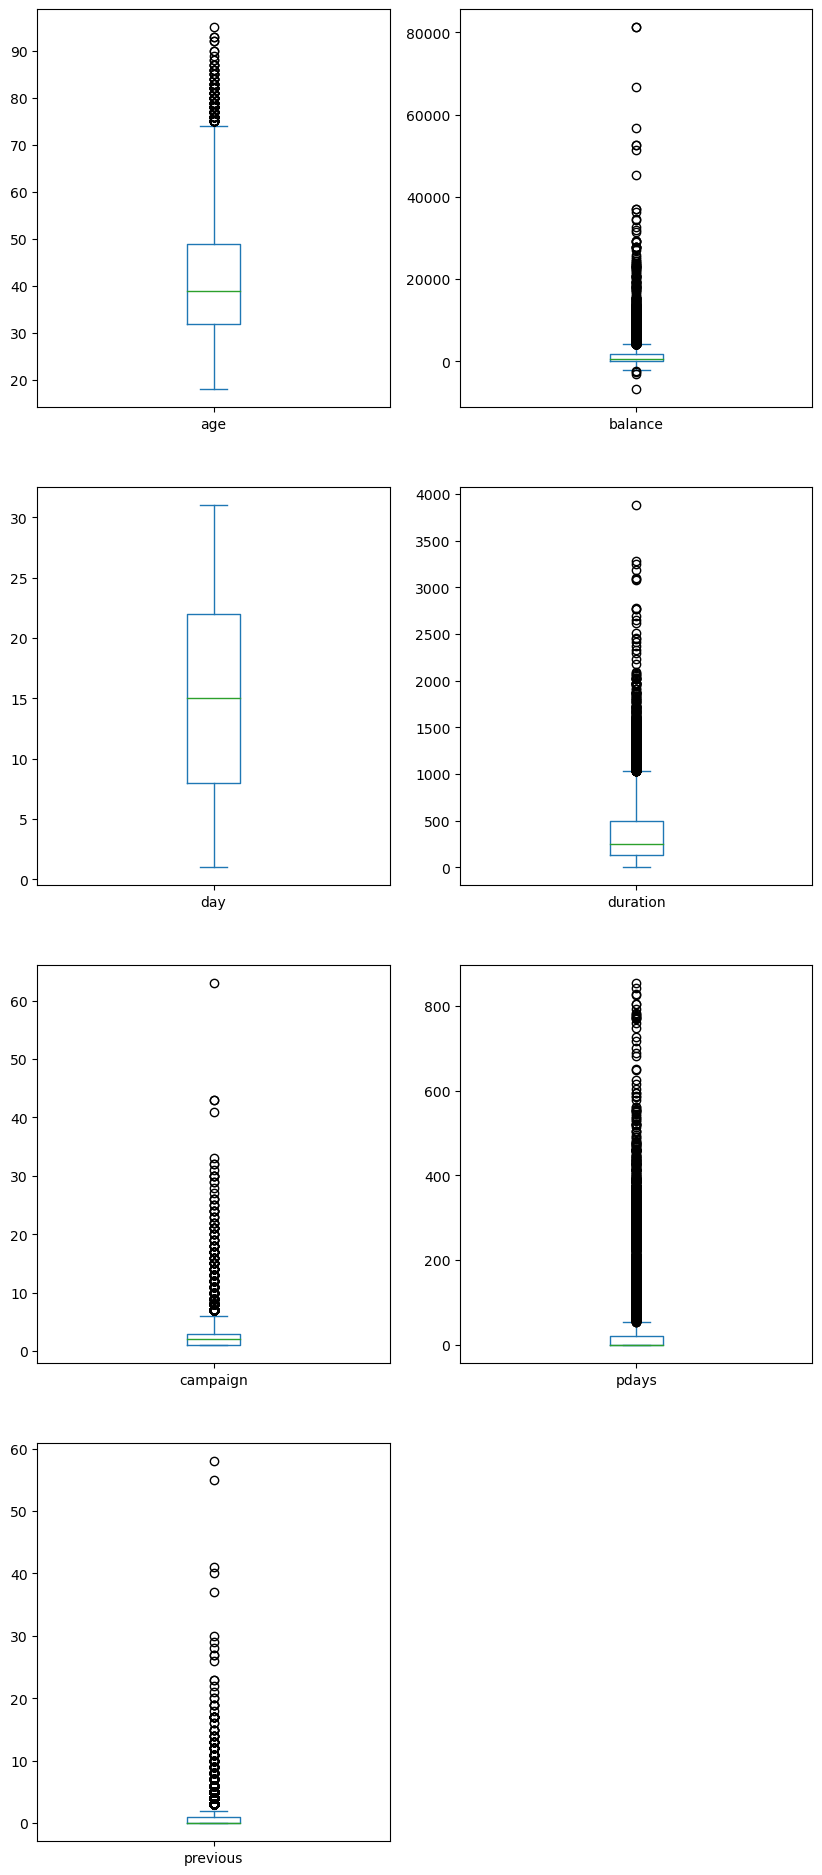

In [59]:
#checking for outliers
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

## Visualizing heatmap

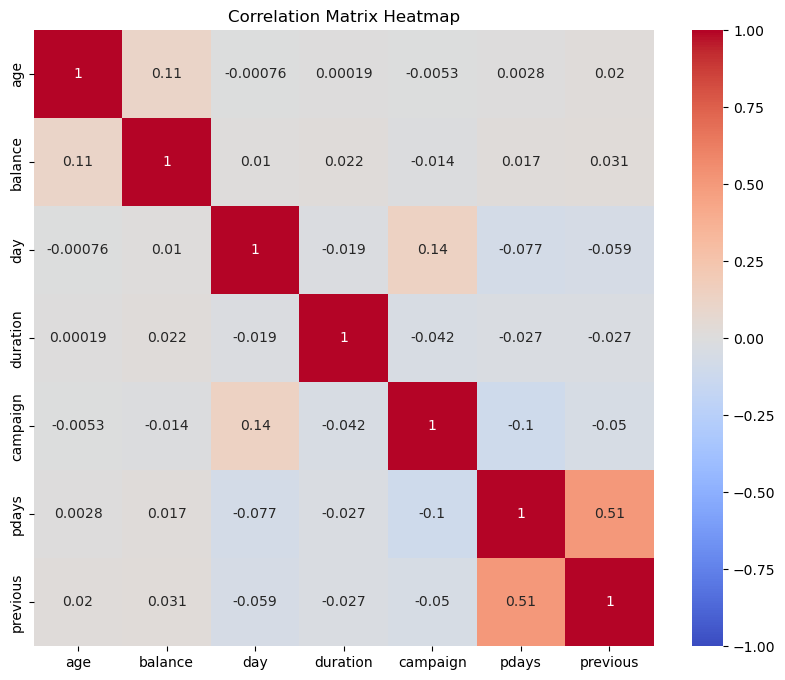

In [60]:


# Select only the numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [61]:
df.shape

(11162, 17)

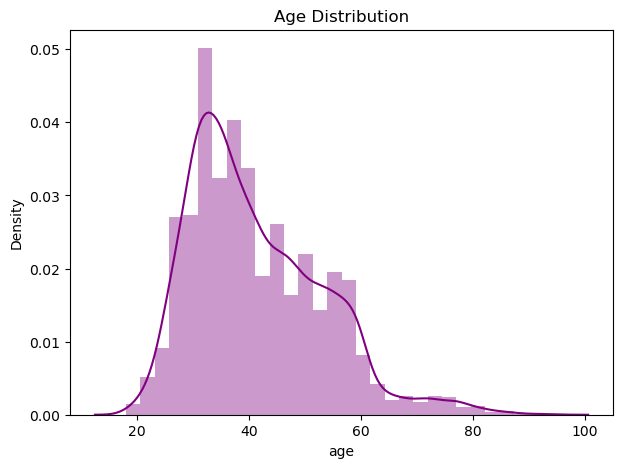

In [62]:
plt.figure(figsize=(7,5))
plt.title('Age Distribution')
sns.distplot(df['age'],hist=True,bins=30,color='purple')
plt.show()

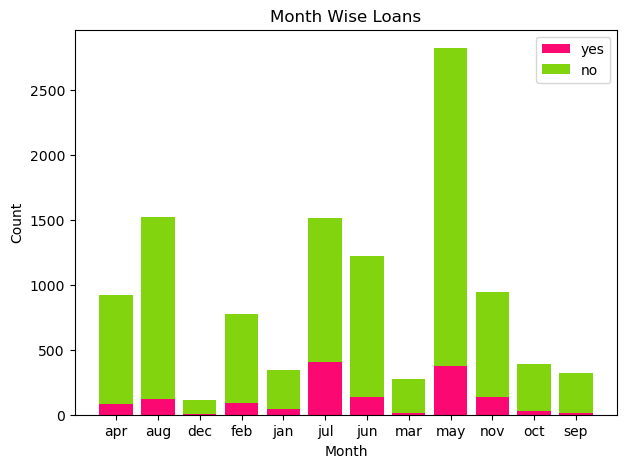

In [63]:
mon_loan=df.groupby(['month','loan']).size().reset_index()
mon_loan.rename(columns={0:'Count'},inplace=True)
mon_loan_yes=mon_loan[mon_loan['loan']=='yes']
mon_loan_no=mon_loan[mon_loan['loan']=='no']
plt.figure(figsize=(7,5))
plt.title('Month Wise Loans')
plt.xlabel('Month')
plt.ylabel('Count')
plt.bar(mon_loan_yes['month'],mon_loan_yes['Count'],label='yes',color='#fc0872')
plt.bar(mon_loan_no['month'],mon_loan_no['Count'],bottom=mon_loan_yes['Count'],label='no',color='#82d40f')
plt.legend()
plt.show()

In [64]:
encoder=LabelEncoder()
df['job']=encoder.fit_transform(df['job'])
df['marital']=encoder.fit_transform(df['marital'])
df['education']=encoder.fit_transform(df['education'])
df['default']=encoder.fit_transform(df['default'])
df['housing']=encoder.fit_transform(df['housing'])
df['loan']=encoder.fit_transform(df['loan'])
df['contact']=encoder.fit_transform(df['contact'])
df['month']=encoder.fit_transform(df['month'])

In [65]:
#Assigning Variables

x=df.drop('default',axis=1)
y=df['default']

In [66]:
#splitting dataset into train and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [67]:
x_train.shape,x_test.shape

((8929, 16), (2233, 16))

In [68]:
y_train.shape,y_test.shape

((8929,), (2233,))